In [64]:
import matplotlib.pyplot as plt
import cv2 # THIS IS ONLY USED TO OPEN THE IMAGE
import math # THIS IS ONLY USED FOR THE GAUSSIAN EXP FUNCTION

In [ ]:
import math
import numpy as np

class Convolve:
    def __init__(self, image):
        self.image = image
        self.ih = len(image)
        self.iw = len(image[0])
    
    """
    Function to just multiply kernel values as it passes through
    """
    def apply(self, kernel):
        kh, kw = len(kernel), len(kernel[0])
        output_height = self.ih - kh + 1
        output_width = self.iw - kw + 1
        
        output = []
        for _ in range(output_height):
            row = [0.0] * output_width
            output.append(row)

        for i in range(output_height):
            for j in range(output_width):

                total = 0.0
                for ki in range(kh):
                    for kj in range(kw):
                        # Convert to float to avoid uint8 overflow (because cv2 loads as numpy array)
                        pixel_val = float(self.image[i + ki][j + kj])
                        total += pixel_val * kernel[ki][kj]
                output[i][j] = total

        return output
    
    """
    Mean Filter replaces the center pixel with average of the surrounding pixels
    """
    def mean_filter(self):
        kernel = [
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9]
        ]
        return self.apply(kernel)
    
    """
    Median Filter takes the median/middle value of all the pizels in the kernel (9 here)
    """

    def median_filter(self):
        output_height = self.ih - 2
        output_width = self.iw - 2
        
        output = []
        for _ in range(output_height):
            row = [0.0] * output_width
            output.append(row)
        
        for i in range(output_height):
            for j in range(output_width):
                # Collect 3x3 neighborhood
                neighborhood = []
                for ki in range(3):
                    for kj in range(3):
                        neighborhood.append(self.image[i + ki][j + kj])
                neighborhood.sort()
                output[i][j] = neighborhood[4]  # Middle element of 9
        
        return output
    
    """
    Gaussian Filter instead of mean value just takes the gaussian function output of each pixel
    """
    def gaussian_filter(self, sigma=2):
        kernel = []
        kernel_sum = 0.0
        
        for i in range(5):
            row = []
            for j in range(5):
                x = i - 2  # Center at (2, 2)
                y = j - 2
                value = math.exp(-(x*x + y*y) / (2 * sigma * sigma))
                row.append(value)
                kernel_sum += value
            kernel.append(row)
        
        # Normalize the kernel
        for i in range(5):
            for j in range(5):
                kernel[i][j] /= kernel_sum
        
        return self.apply(kernel)
    
    """
    Highlight the target pixel while lower the rest
    """
    def sharpening_filter(self):
        # Apply sharpening filter
        kernel = [
            [ 0, -1,  0],
            [-1,  5, -1],
            [ 0, -1,  0]
        ]
        return self.apply(kernel)



def plot_image_results(org_image, output_image, title):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Original image
    axes[0, 0].set_title("Original Image")
    axes[0, 0].imshow(org_image, cmap='gray', vmin=0, vmax=255)
    axes[0, 0].axis('off')
    
    # Output image
    axes[0, 1].set_title(title)
    axes[0, 1].imshow(output_image, cmap='gray', vmin=0, vmax=255)
    axes[0, 1].axis('off')
    
    org_flat = np.array(org_image).flatten()
    out_flat = np.array(output_image).flatten()
    
    # Original histogram
    axes[1, 0].set_title("Original Histogram")
    axes[1, 0].hist(org_flat, bins=256, range=(0, 255), color='gray')
    axes[1, 0].set_xlabel("Value")
    axes[1, 0].set_ylabel("Frequency")
    
    # Output histogram
    axes[1, 1].set_title("Output Histogram")
    axes[1, 1].hist(out_flat, bins=256, range=(0, 255), color='gray')
    axes[1, 1].set_xlabel("Value")
    axes[1, 1].set_ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

#### Initialize the class

In [66]:
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE) #this is a numpy array
conv = Convolve(image)

### Mean Filter

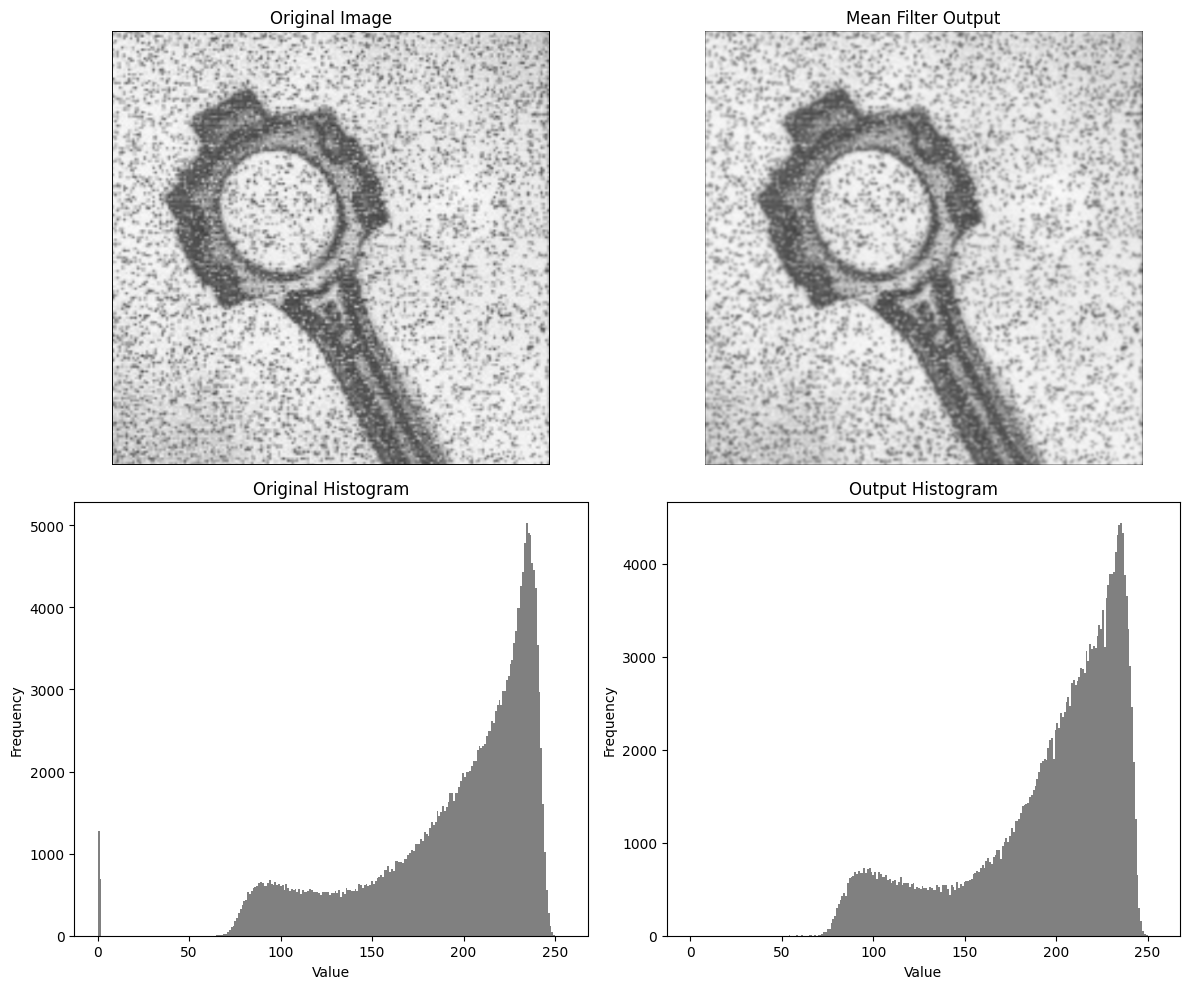

In [67]:
mean_output = conv.mean_filter()
plot_image_results(image, mean_output, "Mean Filter Output")

### Median Filter

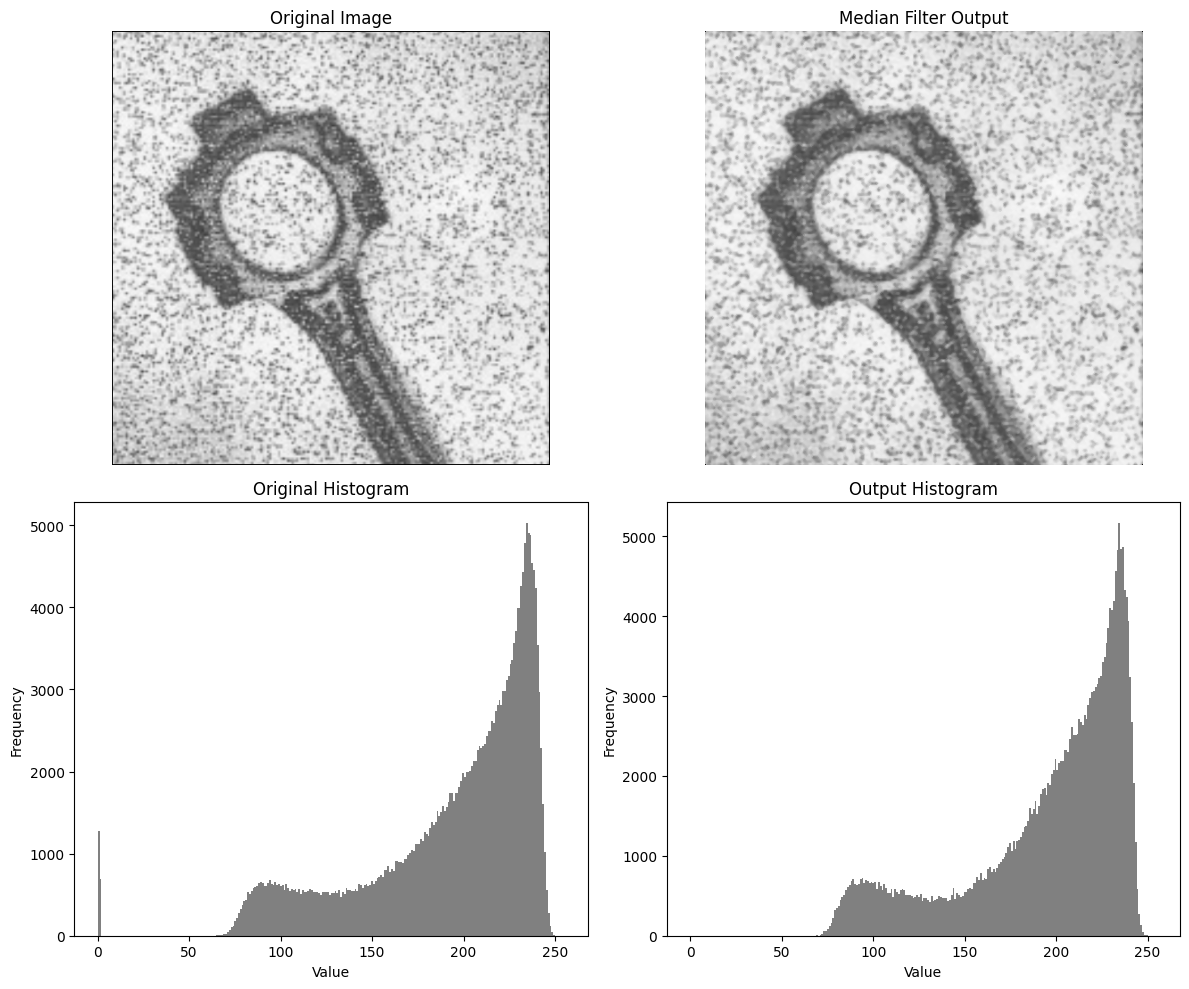

In [68]:
median_output = conv.median_filter()
plot_image_results(image, median_output, "Median Filter Output")

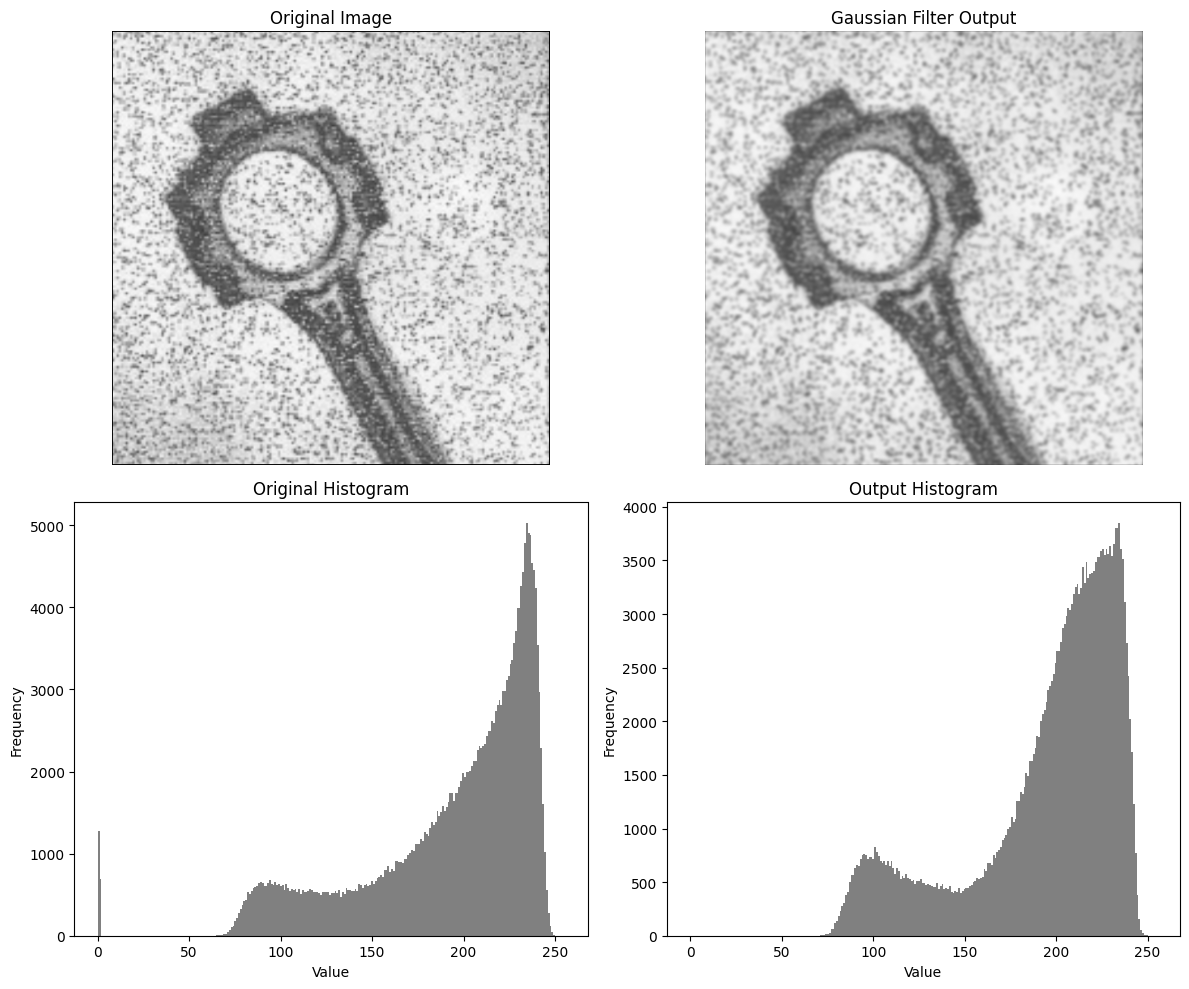

In [69]:
gaussian_output = conv.gaussian_filter(sigma=2)
plot_image_results(image, gaussian_output, "Gaussian Filter Output")

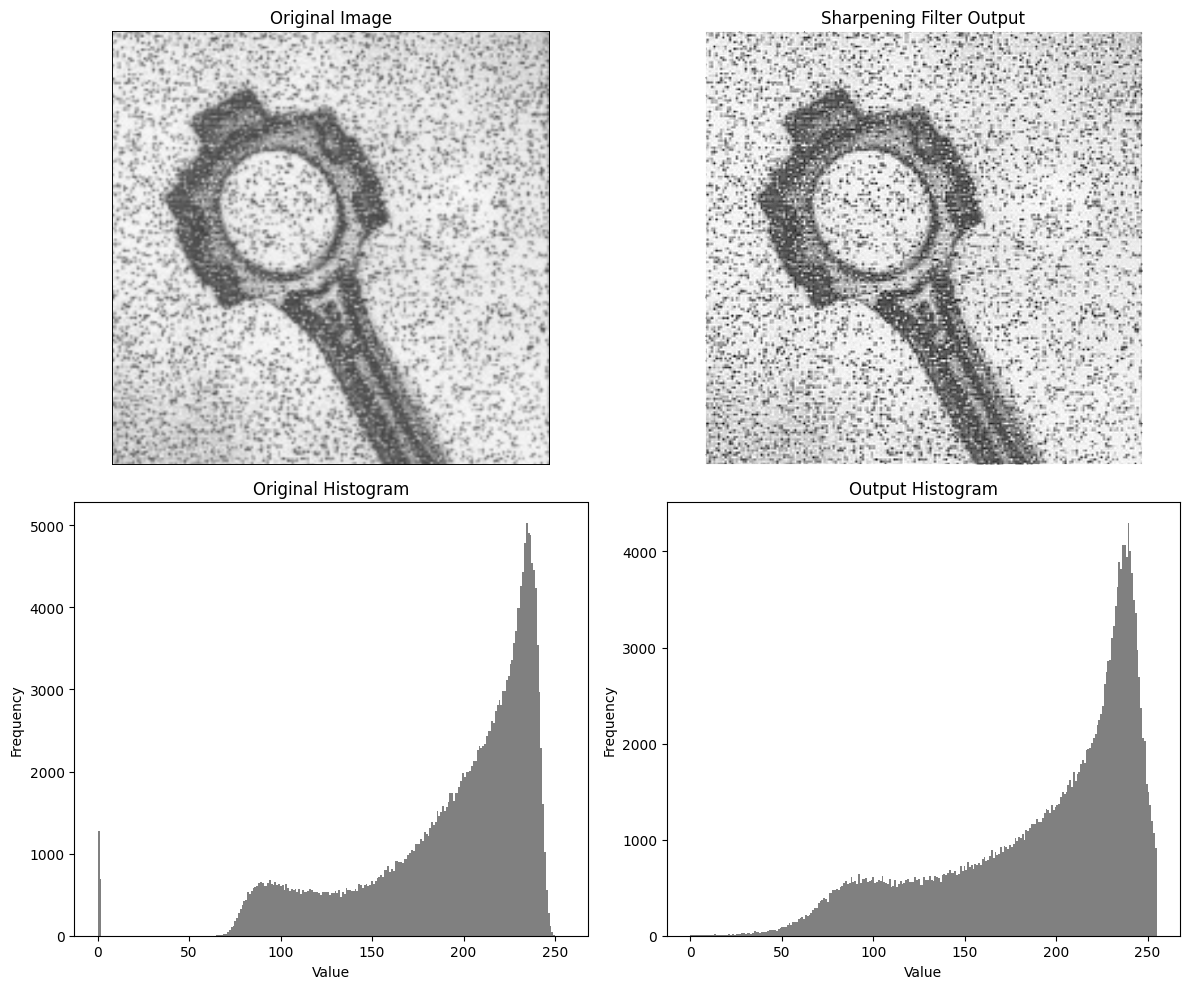

In [70]:
sharpening_output = conv.sharpening_filter()
plot_image_results(image, sharpening_output, "Sharpening Filter Output")